Задача: предсказание баллов ЕГЭ ученика в зависимости от кол-ва лет стажа его репетитора

In [1]:
import numpy as np

In [2]:
X = np.array([[ 1,  1],
              [ 1,  1],
              [ 1,  2],
              [ 1,  5],
              [ 1,  3],
              [ 1,  0],
              [ 1,  5],
              [ 1, 10],
              [ 1,  1],
              [ 1,  2]])

In [3]:
X.shape

(10, 2)

In [4]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [5]:
import matplotlib.pyplot as plt

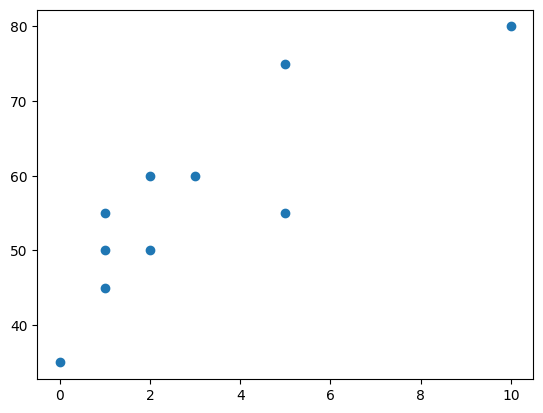

In [6]:
plt.scatter(X[:, 1], y);

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

1 Подберите скорость обучения (alpha) и количество итераций

In [8]:
X

array([[ 1,  1],
       [ 1,  1],
       [ 1,  2],
       [ 1,  5],
       [ 1,  3],
       [ 1,  0],
       [ 1,  5],
       [ 1, 10],
       [ 1,  1],
       [ 1,  2]])

In [37]:
n = X.shape[0]

eta = 0.1
n_iter = 200

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

for i in range(n_iter):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
    for k in range(W.shape[0]):
        W[k] -= eta * (1/n * 2 * X[:, k] @ (y_pred - y))
    if i % 10 == 0:
        eta /= 1.1
#         print(eta)
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err, 2)}')

Number of objects = 10        
Learning rate = 0.1        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [11.8 38.2], MSE = 3047.75
Iteration #10: W_new = [12651.73553914 69617.0969639 ], MSE = 18310954068.05
Iteration #20: W_new = [ 7732434.81888022 42641607.3785219 ], MSE = 9128819654907584.0
Iteration #30: W_new = [1.06344502e+09 5.86454589e+09], MSE = 2.327920364266852e+20
Iteration #40: W_new = [3.00127077e+10 1.65510116e+11], MSE = 2.545133529815946e+23
Iteration #50: W_new = [1.55345341e+11 8.56677968e+11], MSE = 9.572295620500115e+24
Iteration #60: W_new = [1.27742291e+11 7.04456313e+11], MSE = 9.35148012647598e+24
Iteration #70: W_new = [1.38141953e+10 7.61806995e+10], MSE = 1.6408589528283862e+23
Iteration #80: W_new = [1.51674189e+08 8.36432543e+08], MSE = 3.1255335378744607e+19
Iteration #90: W_new = [116395.49982335 641638.79865344], MSE = 31317286806394.33
Iteration #100: W_new = [48.41962396 22.99884644], MSE = 53518.86
Iteration #110: W_new = [44.97713118  3.82798

In [17]:
n = X.shape[0]

etas = [1e-1, 5e-2, 1e-2, 5e-3, 1e-3, 5e-4, 1e-4]
n_iters = [10, 100, 250, 500, 800, 1000]

best_error = np.inf
best_params = {}


for eta in etas:
    for n_iter in n_iters:
        W = np.array([1, 0.5])
        curr_eta = eta
        
        for i in range(n_iter):
            y_pred = np.dot(X, W)
            err = calc_mse(y, y_pred)
            for k in range(W.shape[0]):
                W[k] -= curr_eta * (1/n * 2 * X[:, k] @ (y_pred - y))
            if i % 10 == 0:
                curr_eta /= 1.1
#                 print(f'Iteration #{i}: W_new = {W}, MSE = {round(err, 2)}')
                
        if err < best_error:
            best_error = err
            best_params = {
                'eta': eta,
                'n_iter': n_iter
            }
print(f'Лучшая ошибка {best_error} с параметрами {best_params}')

Лучшая ошибка 43.96875547475652 с параметрами {'eta': 0.1, 'n_iter': 1000}


2*. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее

In [21]:
n = X.shape[0]

eta = 1e-2 
n_iter = 1000 #увеличил количество иттераций

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

for i in range(n_iter):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
#     for k in range(W.shape[0]):
#         W[k] -= eta * (1/n * 2 * X[:, k] @ (y_pred - y))
    # ИЗМЕНЕНИЯ
    W -= eta * (1/n * 2 * np.dot(X.T, y_pred - y)) # взяли X.T транспонировную матрицу
    # ИЗМЕНЕНИЯ
    #
    if i % 100 == 0: # увеличили шаг вывода
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [2.08 4.27], MSE = 3047.75
Iteration #100: W_new = [28.38281518  6.83710367], MSE = 177.43
Iteration #200: W_new = [38.38986469  5.02247953], MSE = 65.33
Iteration #300: W_new = [42.39314129  4.29654705], MSE = 47.39
Iteration #400: W_new = [43.99463466  4.00614091], MSE = 44.52
Iteration #500: W_new = [44.63530512  3.8899652 ], MSE = 44.06
Iteration #600: W_new = [44.89160255  3.84348962], MSE = 43.98
Iteration #700: W_new = [44.99413322  3.82489726], MSE = 43.97
Iteration #800: W_new = [45.03515017  3.81745947], MSE = 43.97
Iteration #900: W_new = [45.05155882  3.81448401], MSE = 43.97


3*. Вместо того, чтобы задавать количество итераций, задайте другое условие останова алгоритма - когда веса перестают изменяться меньше определенного порога  𝜖
 .

In [38]:
n = X.shape[0]

eta = 1e-2 
epsilon = 1e-8
iter_num = 0

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')
weight_dist = np.inf

while weight_dist > epsilon: # условие исполнения пока вес выше epsilon и остановки
    y_pred = np.dot(X, W) 
    err = calc_mse(y, y_pred)

    W_new = W - eta * (1/n * 2 * np.dot(X.T, y_pred - y))
    weight_dist = np.linalg.norm(W_new - W, ord=2) # вычисляем норму матрицы
                                                   # возвращаем наибольшее сингулярное значение исходной матрицы
    W = W_new.copy()
    
    if iter_num % 150 == 0:
        print(f'Iteration #{iter_num}: W_new = {W}, MSE = {round(err,2)}')
    iter_num += 1

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [2.08 4.27], MSE = 3047.75
Iteration #150: W_new = [34.51273915  5.72553647], MSE = 97.36
Iteration #300: W_new = [42.39314129  4.29654705], MSE = 47.39
Iteration #450: W_new = [44.38708413  3.93497626], MSE = 44.19
Iteration #600: W_new = [44.89160255  3.84348962], MSE = 43.98
Iteration #750: W_new = [45.01925858  3.82034116], MSE = 43.97
Iteration #900: W_new = [45.05155882  3.81448401], MSE = 43.97
Iteration #1050: W_new = [45.0597316   3.81300201], MSE = 43.97
Iteration #1200: W_new = [45.06179952  3.81262702], MSE = 43.97
Iteration #1350: W_new = [45.06232276  3.81253214], MSE = 43.97
Iteration #1500: W_new = [45.06245515  3.81250813], MSE = 43.97
Iteration #1650: W_new = [45.06248865  3.81250206], MSE = 43.97
Iteration #1800: W_new = [45.06249713  3.81250052], MSE = 43.97
